In [1]:
import importlib
import textalloc as ta
importlib.reload(ta)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Demo

Examples of text allocation in various plots. Textalloc currently supports avoiding overlap with points and lines.

### Scatterplots:

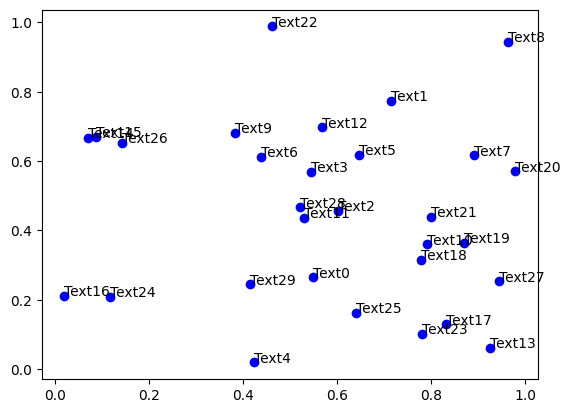

In [2]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
ax.scatter(x, y, c='b')
texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
plt.show()

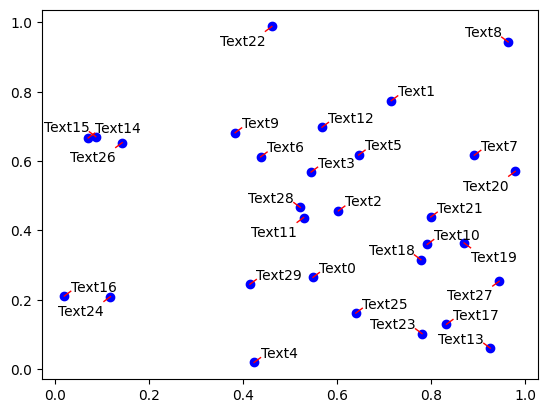

In [3]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
ax.scatter(x, y, c='b')
text_list = [f'Text{i}' for i in range(len(x))]
ta.allocate_text(fig,ax,x,y,
                text_list,
                x_scatter=x, y_scatter=y,
                textsize=10)
plt.show()

### Combined:

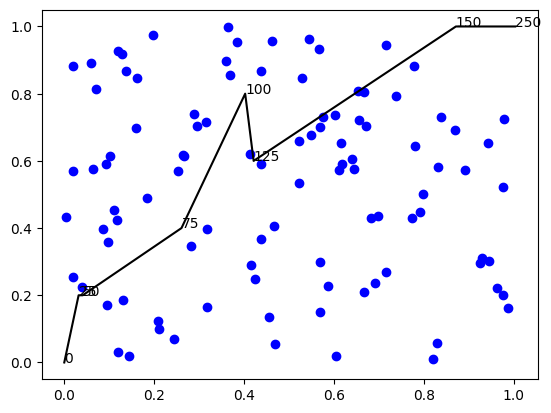

In [4]:
x_line = np.array([0.0, 0.03192317, 0.04101177, 0.26085659, 0.40261173, 0.42142198, 0.87160195, 1.00349979])
y_line = np.array([0. , 0.2, 0.2, 0.4, 0.8, 0.6, 1. , 1. ])
text_list = ['0', '25', '50', '75', '100', '125', '150', '250']
np.random.seed(0)
x, y = np.random.random((2,100))

fig,ax = plt.subplots(dpi=100)
ax.plot(x_line,y_line,color="black")
ax.scatter(x,y,c="b")
for xt, yt, s in zip(x_line, y_line, text_list):
    texts.append(ax.text(xt, yt, s))
plt.show()

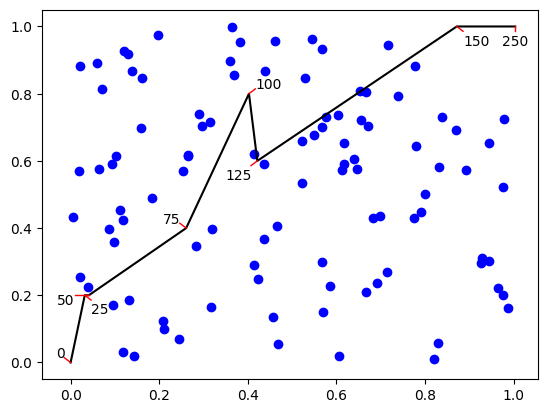

In [5]:
x_line = np.array([0.0, 0.03192317, 0.04101177, 0.26085659, 0.40261173, 0.42142198, 0.87160195, 1.00349979])
y_line = np.array([0. , 0.2, 0.2, 0.4, 0.8, 0.6, 1. , 1. ])
text_list = ['0', '25', '50', '75', '100', '125', '150', '250']
np.random.seed(0)
x, y = np.random.random((2,100))

fig,ax = plt.subplots(dpi=100)
ax.plot(x_line,y_line,color="black")
ax.scatter(x,y,c="b")
ta.allocate_text(fig,ax,x_line,y_line,
                text_list,
                x_scatter=x, y_scatter=y,
                x_lines=[x_line], y_lines=[y_line])
plt.show()

### Bar plot:

/tmp/ipykernel_915/532709737.py:3: DeprecationWarning: This function is deprecated. Please call randint(10, 50 + 1) instead
  y_data = np.random.random_integers(10,50,(100))


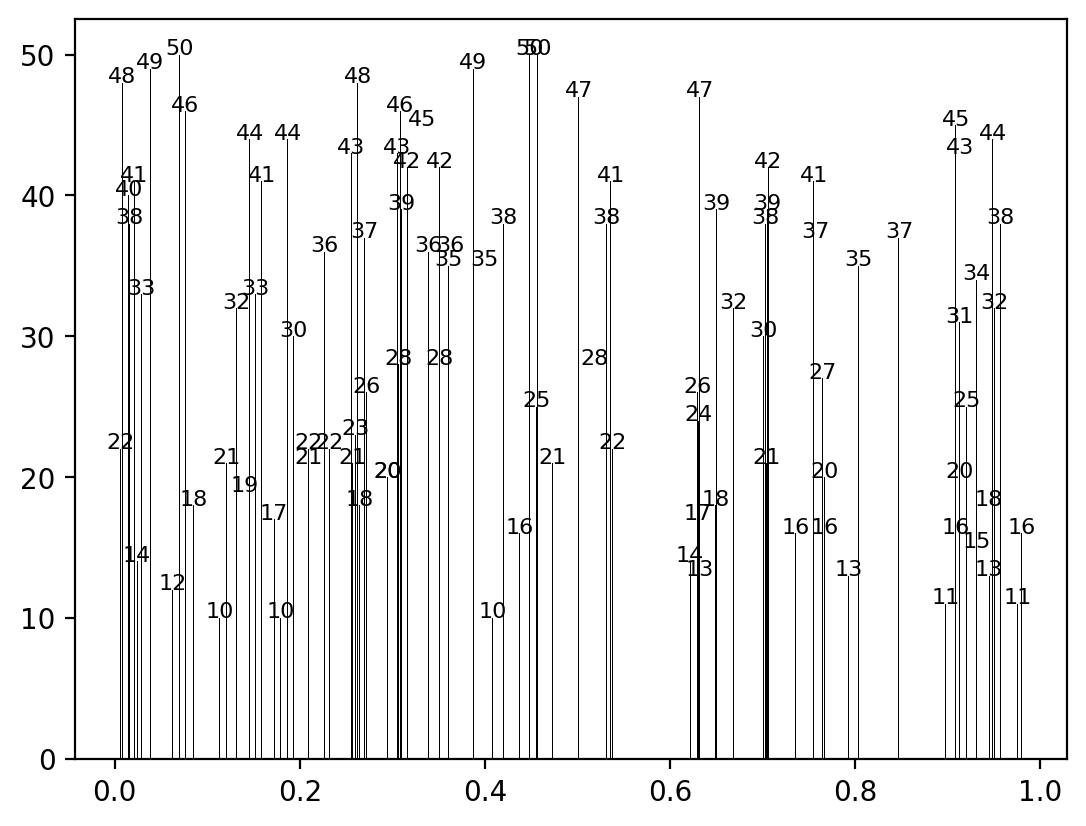

In [7]:
np.random.seed(2017)
x_data = np.random.random_sample(100)
y_data = np.random.random_integers(10,50,(100))

f, ax = plt.subplots(dpi=200)
bars = ax.bar(x_data, y_data, width=0.001, facecolor='k')
for x, y in zip(x_data, y_data):
    plt.text(x, y, y, horizontalalignment='center', size=8, color='k')
plt.show()

/tmp/ipykernel_915/1661723074.py:3: DeprecationWarning: This function is deprecated. Please call randint(10, 50 + 1) instead
  y_data = np.random.random_integers(10,50,(100))


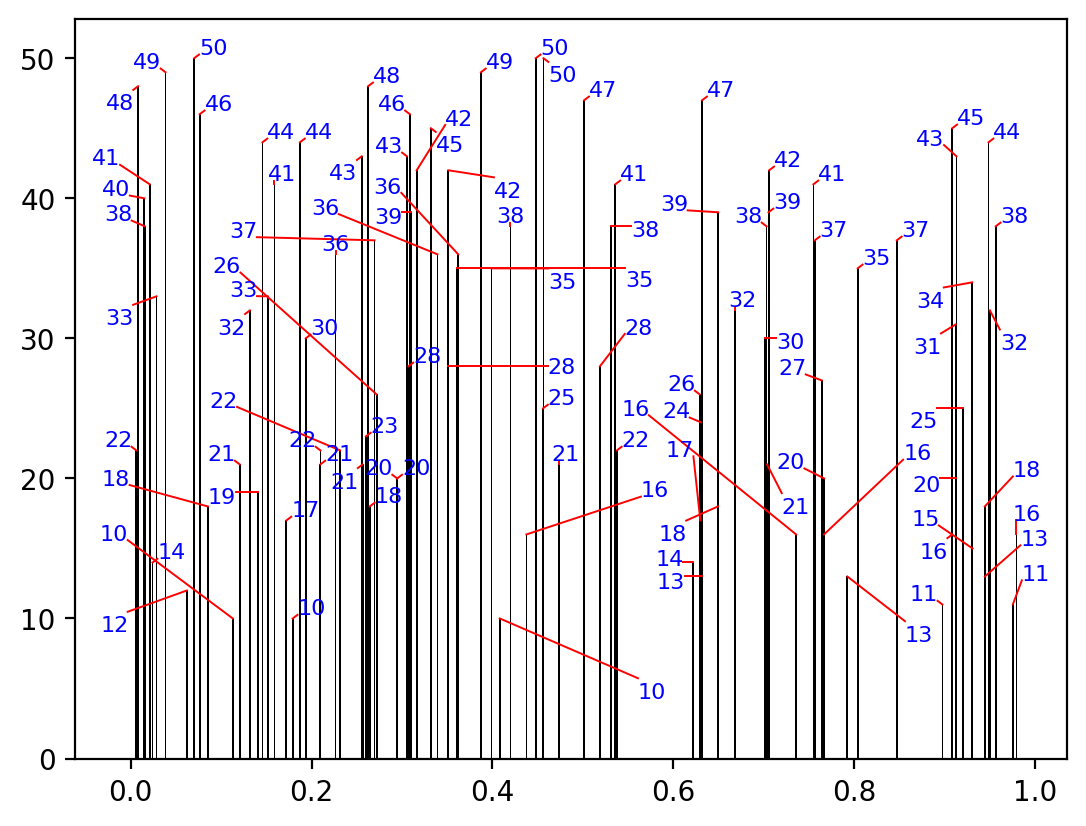

In [8]:
np.random.seed(2017)
x_data = np.random.random_sample(100)
y_data = np.random.random_integers(10,50,(100))

f, ax = plt.subplots(dpi=200)
bars = ax.bar(x_data, y_data, width=0.002, facecolor='k')
ta.allocate_text(f,ax,x_data,y_data,
                [str(yy) for yy in list(y_data)],
                x_lines=[np.array([xx,xx]) for xx in list(x_data)],
                y_lines=[np.array([0,yy]) for yy in list(y_data)], 
                textsize=8,
                margin=0.004,
                min_distance=0.005,
                linewidth=0.7,
                nbr_candidates=100,
                textcolor="b")
plt.show()

### Scattertext

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import scattertext as st
from textalloc.non_overlapping_boxes import get_non_overlapping_boxes


def pyplot_from_scattertext_structure(
    scatterplot_structure,
    figsize,
    textsize,
    scatter_size,
    cmap,
    xlabel,
    ylabel,
    dpi,
    margin=0.01,
    min_distance=0.015,
    max_distance=0.07,
    nbr_candidates=None,
    linecolor=None,
    use_text_alloc=False,
    draw_all=False,
    verbose=False,
):
    # Extract the data
    subset = scatterplot_structure._visualization_data.word_dict["data"]
    df = pd.DataFrame(subset)
    if (
        "etc" in scatterplot_structure._visualization_data.word_dict["data"][0]
        and "ColorScore"
        in scatterplot_structure._visualization_data.word_dict["data"][0]["etc"]
    ):
        df["s"] = [d["etc"]["ColorScore"] for d in subset]
    info = scatterplot_structure._visualization_data.word_dict["info"]
    n_docs = len(scatterplot_structure._visualization_data.word_dict["docs"]["texts"])
    n_words = df.shape[0]

    if scatterplot_structure._show_characteristic:
        characteristic_terms = list(
            df.sort_values("bg", axis=0, ascending=False).iloc[:23].term
        )

    if df.s.isna().sum() > 0:
        colors = "k"
    else:
        colors = df.s

    # Initiate plotting
    fig, ax_plot = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    plt.tight_layout()
    ax_plot.scatter(df.x, df.y, c=colors, s=scatter_size, cmap=cmap)

    # Process extracted textboxes
    if use_text_alloc:
        ta.allocate_text(fig,ax_plot,df.x, df.y, df.term,
                x_scatter=df.x, y_scatter=df.y,
                draw_lines=True, 
                textsize=textsize,
                margin=margin,
                min_distance=min_distance,
                max_distance=max_distance,
                draw_all=draw_all,
                nbr_candidates=nbr_candidates,
                linecolor=linecolor,
                verbose=verbose,
                )
    else:
        for x,y,t in zip(df.x,df.y,df.term):
            ax_plot.text(x,y,t)

    # Design settings
    ax_plot.spines.right.set_visible(False)
    ax_plot.spines.top.set_visible(False)
    if xlabel is not None:
        ax_plot.set_xlabel(xlabel)
    if ylabel is not None:
        ax_plot.set_ylabel(ylabel)
    ax_plot.locator_params(axis="y", nbins=3)
    ax_plot.locator_params(axis="x", nbins=3)
    try:
        if scatterplot_structure._x_axis_labels is not None:
            ax_plot.set_xticks(
                ax_plot.get_xticks()[1:-1], scatterplot_structure._x_axis_labels, size=7
            )
        else:
            ax_plot.set_xticks(
                ax_plot.get_xticks()[1:-1], ["Low", "Medium", "High"], size=7
            )
    except:
        pass
    try:
        if scatterplot_structure._y_axis_labels is not None:
            ax_plot.set_yticks(
                ax_plot.get_yticks()[1:-1],
                scatterplot_structure._y_axis_labels,
                size=7,
                rotation=90,
            )
        else:
            ax_plot.set_yticks(
                ax_plot.get_yticks()[1:-1],
                ["Low", "Medium", "High"],
                size=7,
                rotation=90,
            )
    except:
        pass
    xlims = ax_plot.get_xlim()
    ylims = ax_plot.get_ylim()
    ax_plot.plot(
        [xlims[0], xlims[1]],
        [ylims[0], ylims[1]],
        color="k",
        linestyle="dashed",
        linewidth=1,
        alpha=0.3,
    )

    return fig

/home/ckjellson/anaconda3/envs/advent2022/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
convention_df = st.SampleCorpora.ConventionData2012.get_data().assign(
	parse = lambda df: df.text.apply(st.whitespace_nlp_with_sentences)
)
corpus = st.CorpusFromParsedDocuments(convention_df, category_col='party', parsed_col='parse').build()

In [11]:
structure = st.produce_scattertext_explorer(
	corpus,
	category='republican',
	category_name='Republican',
	not_category_name='Democratic',
	minimum_term_frequency=5,
	pmi_threshold_coefficient=8,
	width_in_pixels=1000,
	metadata=convention_df['speaker'],
	d3_scale_chromatic_url='scattertext/data/viz/scripts/d3-scale-chromatic.v1.min.js',
	d3_url='scattertext/data/viz/scripts/d3.min.js',
    return_scatterplot_structure=True,
)

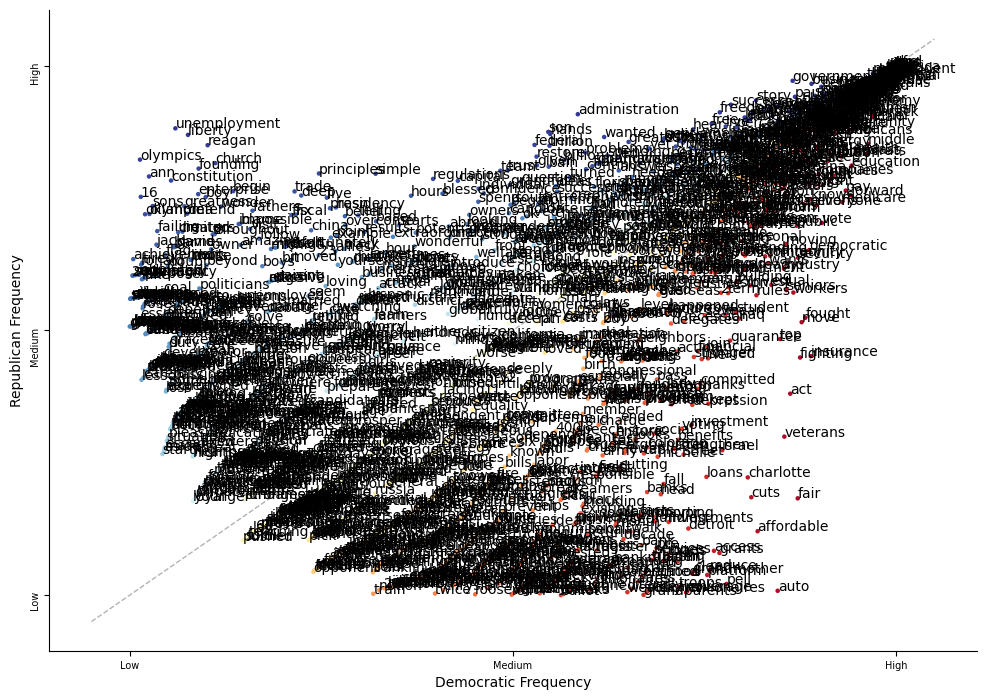

In [12]:
fig = pyplot_from_scattertext_structure(
    structure,
    figsize=(10, 7),
    textsize=10,
    scatter_size=5,
    xlabel="Democratic Frequency",
    ylabel="Republican Frequency",
    dpi=100,
    cmap="RdYlBu",
)
plt.show()

Creating boxes


1949it [00:01, 1571.41it/s]


Processing


1949it [00:01, 1683.81it/s]


Plotting
Finished in 2.6594600677490234s


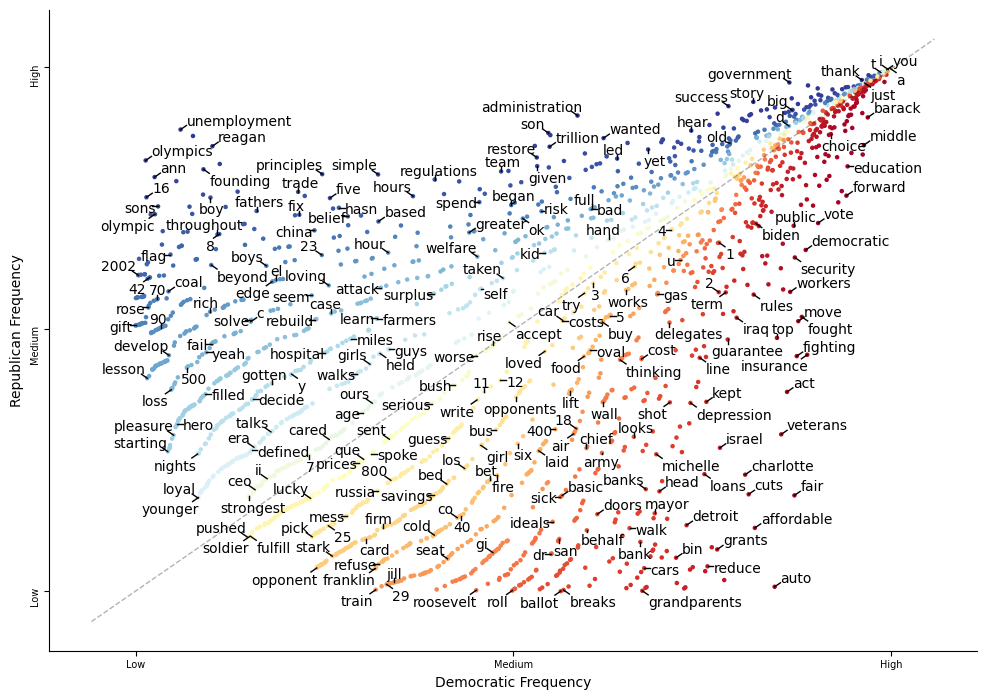

In [14]:
fig = pyplot_from_scattertext_structure(
    structure,
    figsize=(10, 7),
    textsize=10,
    scatter_size=5,
    cmap="RdYlBu",
    xlabel="Democratic Frequency",
    ylabel="Republican Frequency",
    dpi=100,
    margin=0.002,
    min_distance=0.007,
    max_distance=0.02,
    use_text_alloc=True,
    nbr_candidates=36,
    linecolor="k",
    verbose=True,
)
plt.show()

### Implementation of line-box overlap

Visualization of line-box overlap function. We trey three candidates, of which only the third has no overlapping line.

In [15]:
from textalloc.overlap_functions import non_overlapping_with_lines

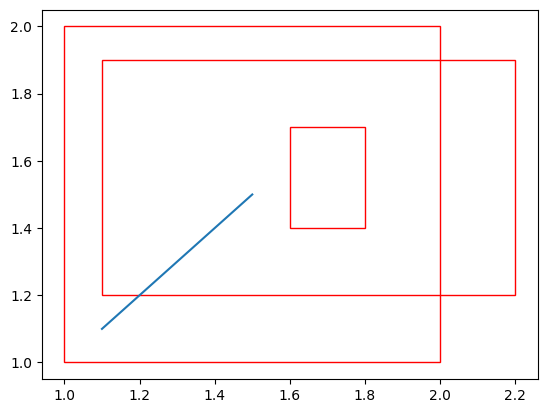

[False False  True]


In [16]:
candidates = np.array([[1,1,2,2],[1.1,1.2,2.2,1.9],[1.6,1.4,1.8,1.7]])
lines_xyxy = np.array([[1.1,1.1,1.5,1.5]])
fig,ax = plt.subplots()
for i in range(lines_xyxy.shape[0]):
    ax.plot([lines_xyxy[i,0],lines_xyxy[i,2]],[lines_xyxy[i,1],lines_xyxy[i,3]])
for i in range(candidates.shape[0]):
    rect = patches.Rectangle((candidates[i,0], candidates[i,1]), candidates[i,2]-candidates[i,0], candidates[i,3]-candidates[i,1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()
xfrac = 0.0
yfrac = 0.0
print(non_overlapping_with_lines(
    lines_xyxy, candidates, xfrac, yfrac
))